<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Mortality_Prediction_ICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source: https://www.kaggle.com/datasets/msafi04/predict-mortality-of-icu-patients-physionet


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mortality Prediction in ICU/train.csv")

In [3]:
labels = pd.read_csv('/content/drive/MyDrive/Mortality Prediction in ICU/labels.csv')

In [4]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [ ]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [6]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [7]:
labels.shape

(3999, 1)

In [8]:
labels_counts= labels['In-hospital_death'].value_counts()
labels_counts 

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [9]:
labels_df = pd.DataFrame({'mortality':labels_counts.index, 'values':labels_counts.values})

In [10]:
labels_df

,mortality,values
0,0,3445
1,1,554


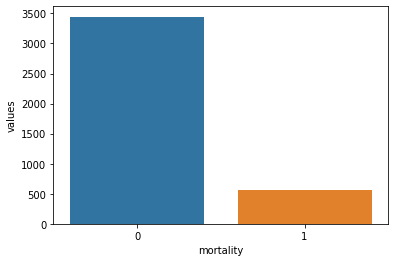

In [18]:
sns.barplot(x='mortality', y='values', data=labels_df)

In [ ]:
df.isnull().sum()

In [20]:
labels.isnull().sum()

In-hospital_death    0
dtype: int64

In [21]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [22]:
print(set(df['ALT'].tolist()))

{3.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 9.25, 12.0, 13.33333333, 14.0, 15.0, 13.0, 17.0, 18.0, 19.0, 19.33333333, 21.66666667, 22.0, 23.0, 24.0, 23.5, 22.66666667, 27.0, 28.0, 25.0, 30.0, 31.0, 32.0, 33.0, 29.5, 35.0, 36.0, 29.0, 38.5, 31.5, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 46.66666667, 48.0, 49.0, 47.0, 10.25, 10.5, 44.33333333, 54.0, 9.5, 56.0, 57.5, 58.0, 59.0, 60.0, 12.5, 61.33333333, 11.0, 64.66666667, 62.0, 66.66666667, 67.0, 63.0, 64.5, 66.0, 14.5, 65.0, 71.66666667, 70.0, 70.2, 15.5, 76.0, 78.33333333, 77.0, 80.5, 16.0, 82.0, 83.0, 79.0, 85.0, 86.0, 85.5, 88.5, 89.0, 90.0, 87.5, 92.5, 93.66666667, 17.5, 95.66666667, 96.0, 19.5, 98.66666667, 96.5, 100.5, 20.5, 102.5, 20.0, 103.0, 98.0, 106.0, 21.5, 21.0, 109.3333333, 110.3333333, 22.5, 112.0, 109.0, 107.5, 113.0, 23.75, 117.3333333, 118.0, 119.6666667, 120.0, 24.5, 121.0, 122.0, 124.6666667, 125.3333333, 125.0, 124.0, 25.5, 128.0, 130.0, 26.0, 131.6666667, 133.0, 126.0, 126.5, 27.5, 134.5, 138.5, 139.0, 140.6666667, 1

In [ ]:
for i in df.columns:
  print("\n")
  print("=================================", i, "========================================")
  print(set(df[i].tolist()))

gender value

ICU type

MechVent

NISysABP = 0

NIDiasABP = 0

NIMAP = 0

RecordID

SysABP

Weight = 3.5

In [24]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [25]:
df['Gender'].value_counts()
df[df['Gender'] == 139060]

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
2570,77.0,31.0,46.0,42,2.973333,19.0,0.7,154.0,1.0,25.3,...,19.0,97.25,116.891892,36.96875,2.1,0.14,111.032258,11.466667,80.060976,7.387273


In [ ]:
df[['Gender', 'Weight', 'Height']].groupby('Gender').mean()

In [38]:
df_female = df[df['Gender']==0]

In [ ]:
df_female[['Height','Weight']].describe()

In [47]:
df_male = df[df['Gender']==1]

In [ ]:
df_male[['Height', 'Weight']].describe()

In [57]:
df.loc[2570, 'Gender'] = 1

In [58]:
df['Gender'].value_counts()

1    2249
0    1750
Name: Gender, dtype: int64

In [59]:
df['ICUType'].value_counts()

3         1481
4         1068
2          874
1          575
133628       1
Name: ICUType, dtype: int64

In [60]:
df[df['ICUType'] == 133628]

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
427,77.0,31.0,46.0,88,2.973333,19.0,0.7,154.0,0.933333,22.0,...,19.0,97.25,116.891892,36.96875,2.1,0.14,111.032258,11.466667,80.060976,7.387273


In [64]:
df.loc[427, 'ICUType'] =3

In [65]:
df['ICUType'].value_counts()

3    1482
4    1068
2     874
1     575
Name: ICUType, dtype: int64

In [66]:
df['MechVent'].value_counts()

1    3999
Name: MechVent, dtype: int64

In [68]:
df.drop('MechVent', axis=1, inplace=True)

In [ ]:
df[df['NISysABP']==0].T

In [72]:
df.drop('RecordID', axis = 1, inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [ ]:
correlation_map = new_df[new_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(35,25)
sns.heatmap(correlation_map, mask=obj, vmax = 0.7, square= True, annot= True)